# 0. Import the libraries you will need to use; do any other set ups


In [161]:
#imports
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import numpy as np
import locale
#set ups
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. Based on the [SCRAPING_PARLIAMENT notebook](https://github.com/iMEdD-Lab/jlab_cmc_2023/blob/main/CLASS_04/SCRAPING_PARLIAMENT_PART_I.ipynb) we worked in class, collect all election results data found on this [webpage](https://www.hellenicparliament.gr/Vouli-ton-Ellinon/To-Politevma/Ekloges/Eklogika-apotelesmata-New/), and create your dataset. 

### You should end up with a df, which will include historical data for all election rounds since 1974 and will look like the screenshot below.


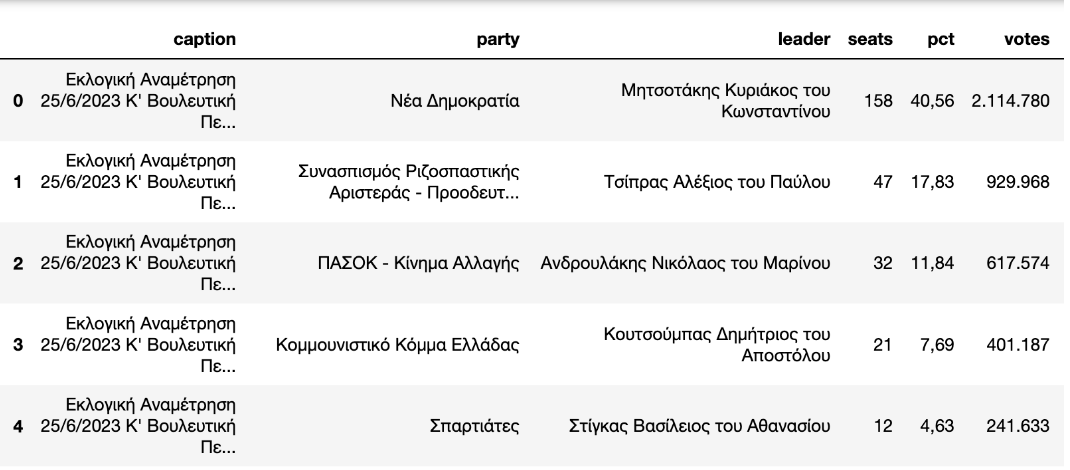

In [162]:
from IPython.display import Image, display

display(Image(filename=r'C:\Users\user\Documents\GitHub\data_journalism_class\class4\Screenshot_4.png'))


In [163]:
#visit the webpage https://www.hellenicparliament.gr/Vouli-ton-Ellinon/To-Politevma/Ekloges/Eklogika-apotelesmata-New/
url = 'https://www.hellenicparliament.gr/Vouli-ton-Ellinon/To-Politevma/Ekloges/Eklogika-apotelesmata-New/'
response = requests.get(url) 
response

<Response [200]>

In [164]:
#parse the webpage
soup = BeautifulSoup(response.text, 'html.parser')
soup


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html lang="el" xml:lang="el" xmlns="http://www.w3.org/1999/xhtml">
<head id="ctl00_Head1"><title>
	Εκλογικά Αποτελέσματα
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="text/css" http-equiv="Content-Style-Type"/>
<link href="/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link href="/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=G-J6Y35P172L"></script>
<script>  
    if (getCookie('agreeToCookies') == '1') {
        window.dataLayer = window.dataLayer || [];
        function gtag() { dataLayer.push(arguments); }
        gtag('js', new Date()); gtag('config', 'G-J6Y35P172L');
    }

    function getCookie(cname) {
        var name = cname + "=";
        var decodedCookie = decodeURIComponent(document.cookie);
        var ca = decodedCoo

In [165]:
#find tables and count the length of the list of tables
len(soup.find_all('table'))

22

In [166]:
#try to grab all captions
soup.find_all('caption')

[<caption><br/>
 	Εκλογική Αναμέτρηση <strong>25/6/2023</strong><br/>
 	Κ' Βουλευτική Περίοδος 25/6/2023</caption>,
 <caption><br/>
 	Εκλογική Αναμέτρηση <strong>21/5/2023</strong><br/>
 	ΙΘ' Βουλευτική Περίοδος 21/5/2023 έως 29/5/2023</caption>,
 <caption><br/>
 	Εκλογική Αναμέτρηση <strong>7/7/2019</strong><br/>
 	ΙΗ' Βουλευτική Περίοδος 7/7/2019 έως 22/4/2023</caption>,
 <caption><br/>
 	Εκλογική Αναμέτρηση <strong>20/9/2015</strong><br/>
 	ΙZ' Βουλευτική Περίοδος 20/9/2015 έως 11/06/2019</caption>,
 <caption><br/>
 	Εκλογική Αναμέτρηση <strong>25/1/2015</strong><br/>
 	ΙΣΤ' Βουλευτική Περίοδος 25/1/2015 έως 28/08/2015</caption>,
 <caption><br/>
 <br/>
 	Εκλογική Αναμέτρηση <strong>17/6/2012</strong><br/>
 	ΙΕ' Βουλευτική Περίοδος 17/6/2012 έως 31/12/2014</caption>,
 <caption><br/>
 <br/>
 	Εκλογική Αναμέτρηση <strong>6/5/2012</strong><br/>
 	ΙΔ' Βουλευτική Περίοδος 6/5/2012 έως 19/5/2012</caption>,
 <caption><br/>
 <br/>
 	Εκλογική Αναμέτρηση <strong>4/10/2009</strong><br/>
 	ΙΓ' Β

In [167]:
captions = soup.find_all('caption')
captions_list = [caption.text for caption in captions]

In [168]:
#find all captions and count the length of the list of captions
len(captions)

20

In [169]:
#let's scrape election results data

#find all tables and store them in a variable
tables = soup.find_all('table')

#loop through tables
#for each table in tables
for table in tables:
    
    #find all rows and store them in a variable
    rows = table.find_all('tr')
    
    #now, loop through rows
    #for each row in rows
    for row in rows:
        
        #find all cells and store them in a variable
        cells = row.find_all('td')
        
        #for each cell in cells
        for cell in cells:
            #just print it to check out what you are getting
            print(cell.text)

Νέα Δημοκρατία
Μητσοτάκης Κυριάκος του Κωνσταντίνου
158
40,56
2.114.780
Συνασπισμός Ριζοσπαστικής Αριστεράς - Προοδευτική Συμμαχία
Τσίπρας Αλέξιος του Παύλου
47
17,83
929.968
ΠΑΣΟΚ - Κίνημα Αλλαγής
Ανδρουλάκης Νικόλαος του Μαρίνου
32
11,84
617.574
Κομμουνιστικό Κόμμα Ελλάδας
Κουτσούμπας Δημήτριος του Αποστόλου
21
7,69
401.187
Σπαρτιάτες
Στίγκας Βασίλειος του Αθανασίου
12
4,63
241.633
Ελληνική Λύση - Κυριάκος Βελόπουλος
Βελόπουλος Κυριάκος του Ιωσήφ
12
4,44
231.378
Δημοκρατικό Πατριωτικό Κίνημα "ΝΙΚΗ"
Νατσιός Δημήτριος του Ιωάννη
10
3,69
192.239
Πλεύση Ελευθερίας - Ζωή Κωνσταντοπούλου
Κωνσταντοπούλου Ζωή του Νικολάου
8
3,17
165.210
Νέα Δημοκρατία
Μητσοτάκης Κυριάκος του Κωνσταντίνου
146
40,79
2.407.860
Συνασπισμός Ριζοσπαστικής Αριστεράς
Τσίπρας Αλέξιος του Παύλου
71
20,07
1.184.500
Κίνημα Αλλαγής
Ανδρουλάκης Νικόλαος του Μαρίνου
41
11,46
676.166
Κομμουνιστικό Κόμμα Ελλάδας
Κουτσούμπας Δημήτριος του Αποστόλου
26
7,23
426.741
Ελληνική Λύση - Κυριάκος Βελόπουλος
Βελόπουλος Κυριάκος του Ιω

In [170]:
#ok! let's try to get parties only

#create an empty list
data = []

#find all tables and store them in a variable named tables
tables = soup.find_all('table')

#loop through tabels
for table in tables:
    #find all rows in each table and store them in a variable named rows
    rows = table.find_all('tr')
    
    #now, loop through the rows
    #for each row in rows
    for row in rows:
        
        # find all cells' values and store them in a variable named cells
        cells = row.find_all('td')
        
        #keep only those cells that hold parties values
        #store them in a variable called parties
        #parties equal to the cell value you are getting every 5 steps
        parties = cells[0::5]

        #now, loop through the parties
        for party in parties:
            
            #create an empty dictionary called myparties
            myparties = {}
            
            #give it a key and value
            myparties['party'] = party.text         
            
            #at the same time, print each one of those parties if you want to check them out while you scrape them
            print(party.text.strip())
            
            #and append your initially empty list with your myparties dictionary
            data.append(myparties)

Νέα Δημοκρατία
Συνασπισμός Ριζοσπαστικής Αριστεράς - Προοδευτική Συμμαχία
ΠΑΣΟΚ - Κίνημα Αλλαγής
Κομμουνιστικό Κόμμα Ελλάδας
Σπαρτιάτες
Ελληνική Λύση - Κυριάκος Βελόπουλος
Δημοκρατικό Πατριωτικό Κίνημα "ΝΙΚΗ"
Πλεύση Ελευθερίας - Ζωή Κωνσταντοπούλου
Νέα Δημοκρατία
Συνασπισμός Ριζοσπαστικής Αριστεράς
Κίνημα Αλλαγής
Κομμουνιστικό Κόμμα Ελλάδας
Ελληνική Λύση - Κυριάκος Βελόπουλος
Νέα Δημοκρατία
Συνασπισμός Ριζοσπαστικής Αριστεράς
Κίνημα Αλλαγής
Κομμουνιστικό Κόμμα Ελλάδας
Ελληνική Λύση - Κυριάκος Βελόπουλος
ΜέΡΑ25
Συνασπισμός Ριζοσπαστικής Αριστεράς
Νέα Δημοκρατία
Λαϊκός Σύνδεσμος Χρυσή Αυγή
Δημοκρατική Συμπαράταξη (ΠΑ.ΣΟ.Κ. - ΔΗΜ.ΑΡ.)
Κομμουνιστικό Κόμμα Ελλάδας
Το Ποτάμι
Ανεξάρτητοι Έλληνες - Εθνική
			Πατριωτική Δημοκρατική Συμμαχία
Ένωση Κεντρώων
Συνασπισμός Ριζοσπαστικής Αριστεράς
Νέα Δημοκρατία
Λαϊκός Σύνδεσμος Χρυσή Αυγή
Το Ποτάμι
Κομμουνιστικό Κόμμα Ελλάδας
Ανεξάρτητοι Έλληνες Εθνική Πατριωτική Δημοκρατική
			Συμμαχία, Αγροτικό Κτηνοτροφικό Κόμμα Ελλάδας,
			Λευκό, Πυρίκαυστος Ελλά

In [171]:
len(data)

115

In [172]:
# turn this into a df called parties
df1 = pd.DataFrame(data)

# see how this looks like
df1

,party
0,Νέα Δημοκρατία
1,Συνασπισμός Ριζοσπαστικής Αριστεράς - Προοδευτ...
2,ΠΑΣΟΚ - Κίνημα Αλλαγής
3,Κομμουνιστικό Κόμμα Ελλάδας
4,Σπαρτιάτες
5,Ελληνική Λύση - Κυριάκος Βελόπουλος
6,"Δημοκρατικό Πατριωτικό Κίνημα ""ΝΙΚΗ"""
7,Πλεύση Ελευθερίας - Ζωή Κωνσταντοπούλου
8,Νέα Δημοκρατία
9,Συνασπισμός Ριζοσπαστικής Αριστεράς


In [173]:
def is_number(value):
    try:
        float(value.replace('.', ''))  
        return True
    except ValueError:
        return False

df1 = df1[~df1['party'].apply(is_number)]

df1

,party
0,Νέα Δημοκρατία
1,Συνασπισμός Ριζοσπαστικής Αριστεράς - Προοδευτ...
2,ΠΑΣΟΚ - Κίνημα Αλλαγής
3,Κομμουνιστικό Κόμμα Ελλάδας
4,Σπαρτιάτες
5,Ελληνική Λύση - Κυριάκος Βελόπουλος
6,"Δημοκρατικό Πατριωτικό Κίνημα ""ΝΙΚΗ"""
7,Πλεύση Ελευθερίας - Ζωή Κωνσταντοπούλου
8,Νέα Δημοκρατία
9,Συνασπισμός Ριζοσπαστικής Αριστεράς


In [174]:
df1

,party
0,Νέα Δημοκρατία
1,Συνασπισμός Ριζοσπαστικής Αριστεράς - Προοδευτ...
2,ΠΑΣΟΚ - Κίνημα Αλλαγής
3,Κομμουνιστικό Κόμμα Ελλάδας
4,Σπαρτιάτες
5,Ελληνική Λύση - Κυριάκος Βελόπουλος
6,"Δημοκρατικό Πατριωτικό Κίνημα ""ΝΙΚΗ"""
7,Πλεύση Ελευθερίας - Ζωή Κωνσταντοπούλου
8,Νέα Δημοκρατία
9,Συνασπισμός Ριζοσπαστικής Αριστεράς


In [175]:
df1 = df1.reset_index().drop(['index'],axis=1)

df1

,party
0,Νέα Δημοκρατία
1,Συνασπισμός Ριζοσπαστικής Αριστεράς - Προοδευτ...
2,ΠΑΣΟΚ - Κίνημα Αλλαγής
3,Κομμουνιστικό Κόμμα Ελλάδας
4,Σπαρτιάτες
5,Ελληνική Λύση - Κυριάκος Βελόπουλος
6,"Δημοκρατικό Πατριωτικό Κίνημα ""ΝΙΚΗ"""
7,Πλεύση Ελευθερίας - Ζωή Κωνσταντοπούλου
8,Νέα Δημοκρατία
9,Συνασπισμός Ριζοσπαστικής Αριστεράς


In [176]:

dt = []


tables = soup.find_all('table')

for table in tables:
    
    rows = table.find_all('tr')
 
    for row in rows:
        
       
        cells = row.find_all('td')
        
        leaders= cells[1::5]

       
        for leader in leaders:
            
           
            myleaders = {}
            
            myleaders['leader'] = leader.text         
            
            
            print(leader.text.strip())
            
     
            dt.append(myleaders)

Μητσοτάκης Κυριάκος του Κωνσταντίνου
Τσίπρας Αλέξιος του Παύλου
Ανδρουλάκης Νικόλαος του Μαρίνου
Κουτσούμπας Δημήτριος του Αποστόλου
Στίγκας Βασίλειος του Αθανασίου
Βελόπουλος Κυριάκος του Ιωσήφ
Νατσιός Δημήτριος του Ιωάννη
Κωνσταντοπούλου Ζωή του Νικολάου
Μητσοτάκης Κυριάκος του Κωνσταντίνου
Τσίπρας Αλέξιος του Παύλου
Ανδρουλάκης Νικόλαος του Μαρίνου
Κουτσούμπας Δημήτριος του Αποστόλου
Βελόπουλος Κυριάκος του Ιωσήφ
Μητσοτάκης Κυριάκος του Κωνσταντίνου
Τσίπρας Αλέξιος του Παύλου
Γεννηματά Φωτεινή (Φώφη) του Γεωργίου
Κουτσούμπας Δημήτριος του Αποστόλου
Βελόπουλος Κυριάκος του Ιωσήφ
Βαρουφάκης Ιωάννης (Γιάνης) του Γεωργίου
Τσίπρας Αλέξιος του Παύλου
Μεϊμαράκης Ευάγγελος - Βασίλειος του Ιωάννη
Μιχαλολιάκος Νικόλαος του Γεωργίου
Γενηματά Φωτεινή του Γεωργίου
Κουτσούμπας Δημήτριος του Αποστόλου
Θεοδωράκης Σταύρος του Παναγιώτη
Καμμένος Παναγιώτης του Ηλία
Λεβέντης Βασίλης του Αποστόλου
Τσίπρας Αλέξιος του Παύλου
Σαμαράς Αντώνιος του Κωνσταντίνου
Μιχαλολιάκος Νικόλαος του Γεωργίου
Θεοδωράκης

In [177]:
df2 = pd.DataFrame(dt)
df2

,leader
0,Μητσοτάκης Κυριάκος του Κωνσταντίνου
1,Τσίπρας Αλέξιος του Παύλου
2,Ανδρουλάκης Νικόλαος του Μαρίνου
3,Κουτσούμπας Δημήτριος του Αποστόλου
4,Στίγκας Βασίλειος του Αθανασίου
5,Βελόπουλος Κυριάκος του Ιωσήφ
6,Νατσιός Δημήτριος του Ιωάννη
7,Κωνσταντοπούλου Ζωή του Νικολάου
8,Μητσοτάκης Κυριάκος του Κωνσταντίνου
9,Τσίπρας Αλέξιος του Παύλου


In [178]:
len(df2)


109

In [179]:
st= []

tables = soup.find_all('table')

for table in tables:
    rows = table.find_all('tr')
    
    for row in rows:
        
        cells = row.find_all('td')
     
        seat= cells[2::5]

        for seats in seat:
           
            myseat = {}
            
            myseat['seats'] = seats.text         
            
            print(seats.text.strip())
            
            st.append(myseat)

158
47
32
21
12
12
10
8
146
71
41
26
16
158
86
22
15
10
9
145
75
18
17
15
11
10
9
149
76
17
17
15
13
13
129
71
33
20
18
17
12
108
52
41
33
26
21
19
160
91
21
15
13
152
102
22
14
10
165
117
12
6
158
125
11
6
162
108
11
10
9
170
111
10
9
150
123
19
1
1
6
148
128
21
1
2
145
125
28
1
1
161
126
12
1
172
115
13
171
93
16
11
5
2
2
220
60
12
8


In [180]:
df3 = pd.DataFrame(st)

In [181]:
len(df3)

109

In [182]:
df3

,seats
0,158
1,47
2,32
3,21
4,12
5,12
6,10
7,8
8,146
9,71


In [183]:
df4 = df1.join(df2)

In [184]:
df4

,party,leader
0,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου
1,Συνασπισμός Ριζοσπαστικής Αριστεράς - Προοδευτ...,Τσίπρας Αλέξιος του Παύλου
2,ΠΑΣΟΚ - Κίνημα Αλλαγής,Ανδρουλάκης Νικόλαος του Μαρίνου
3,Κομμουνιστικό Κόμμα Ελλάδας,Κουτσούμπας Δημήτριος του Αποστόλου
4,Σπαρτιάτες,Στίγκας Βασίλειος του Αθανασίου
5,Ελληνική Λύση - Κυριάκος Βελόπουλος,Βελόπουλος Κυριάκος του Ιωσήφ
6,"Δημοκρατικό Πατριωτικό Κίνημα ""ΝΙΚΗ""",Νατσιός Δημήτριος του Ιωάννη
7,Πλεύση Ελευθερίας - Ζωή Κωνσταντοπούλου,Κωνσταντοπούλου Ζωή του Νικολάου
8,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου
9,Συνασπισμός Ριζοσπαστικής Αριστεράς,Τσίπρας Αλέξιος του Παύλου


In [185]:
df5 = df4.join(df3)

In [186]:
df5

,party,leader,seats
0,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου,158
1,Συνασπισμός Ριζοσπαστικής Αριστεράς - Προοδευτ...,Τσίπρας Αλέξιος του Παύλου,47
2,ΠΑΣΟΚ - Κίνημα Αλλαγής,Ανδρουλάκης Νικόλαος του Μαρίνου,32
3,Κομμουνιστικό Κόμμα Ελλάδας,Κουτσούμπας Δημήτριος του Αποστόλου,21
4,Σπαρτιάτες,Στίγκας Βασίλειος του Αθανασίου,12
5,Ελληνική Λύση - Κυριάκος Βελόπουλος,Βελόπουλος Κυριάκος του Ιωσήφ,12
6,"Δημοκρατικό Πατριωτικό Κίνημα ""ΝΙΚΗ""",Νατσιός Δημήτριος του Ιωάννη,10
7,Πλεύση Ελευθερίας - Ζωή Κωνσταντοπούλου,Κωνσταντοπούλου Ζωή του Νικολάου,8
8,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου,146
9,Συνασπισμός Ριζοσπαστικής Αριστεράς,Τσίπρας Αλέξιος του Παύλου,71


In [187]:

per = []

tables = soup.find_all('table')

for table in tables:
   
    rows = table.find_all('tr')
    
    for row in rows:
        cells = row.find_all('td')
        pcts = cells[3::5]

        for pct in pcts:
        
            mypcts = {}
            
            mypcts['pct'] = pct.text         
            print(pct.text.strip())
            per.append(mypcts)

40,56
17,83
11,84
7,69
4,63
4,44
3,69
3,17
40,79
20,07
11,46
7,23
4,45
39,85
31,53
8,10
5,30
3,70
3,44
35,46
28,10
6,99
6,28
5,55
4,09
3,69
3,43
36,34
27,81
6,28
6,05
5,47
4,75
4,68
29,66
26,89
12,28
7,51
6,92
6,25
4,5
18,85
16,79
13,18
10,62
8,48
6,97
6,11
43,94
33,49
7,53
5,62
4,59
41,84
38,10
8,15
5,04
3,80
45,36
40,55
5,90
3,26
43,80
42,73
5,52
3,2
41,49
38,12
5,6
5,12
4,44
46,88
39,30
4,88
4,54
46,89
38,61
10,28
0,77
0,67

46,19
40,68
10,97
0,58

44,28
39,13
13,13
1,01
0,39
45,82
40,84
9,89
1,84
48,07
35,87
10,93
41,84
25,34
11,95
9,36
6,82
2,72
1,08
54,37
20,42
13,58
9,47


In [188]:
df6 = pd.DataFrame(per)
len(df6)

109

In [189]:
df6

,pct
0,"40,56"
1,"17,83"
2,"11,84"
3,"7,69"
4,"4,63"
5,"4,44"
6,"3,69"
7,"3,17"
8,"40,79"
9,"20,07"


In [190]:
df7 = df5.join(df6)
df7

,party,leader,seats,pct
0,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου,158,"40,56"
1,Συνασπισμός Ριζοσπαστικής Αριστεράς - Προοδευτ...,Τσίπρας Αλέξιος του Παύλου,47,"17,83"
2,ΠΑΣΟΚ - Κίνημα Αλλαγής,Ανδρουλάκης Νικόλαος του Μαρίνου,32,"11,84"
3,Κομμουνιστικό Κόμμα Ελλάδας,Κουτσούμπας Δημήτριος του Αποστόλου,21,"7,69"
4,Σπαρτιάτες,Στίγκας Βασίλειος του Αθανασίου,12,"4,63"
5,Ελληνική Λύση - Κυριάκος Βελόπουλος,Βελόπουλος Κυριάκος του Ιωσήφ,12,"4,44"
6,"Δημοκρατικό Πατριωτικό Κίνημα ""ΝΙΚΗ""",Νατσιός Δημήτριος του Ιωάννη,10,"3,69"
7,Πλεύση Ελευθερίας - Ζωή Κωνσταντοπούλου,Κωνσταντοπούλου Ζωή του Νικολάου,8,"3,17"
8,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου,146,"40,79"
9,Συνασπισμός Ριζοσπαστικής Αριστεράς,Τσίπρας Αλέξιος του Παύλου,71,"20,07"


In [191]:
#vt = []

#tables = soup.find_all('table')

#for table in tables:
   
 #   rows = table.find_all('tr')
    
  #  for row in rows:
   #     cells = row.find_all('td')
    #    vts = cells[4::5]

     #   for votes in vts:
        
      #      myvts = {}
            
       #     myvts['votes'] = votes.text         
        #    print(votes.text.strip())
         #   vt.append(myvts)

In [192]:

votes_list = []
tables = soup.find_all('table')

for table in tables:
    style_attribute = table.get('style', '')
    if 'display: none;' not in style_attribute.lower():
        
        caption_tag = table.find('caption')
        current_caption = caption_tag.text.strip() if caption_tag else "Unknown"
        current_caption = re.sub(r'\s+', ' ', current_caption)

        
        rows = table.find_all('tr')
        for row in rows:
            cells = row.find_all('td')
            vts = cells[4::5]

            for votes in vts:
               
                myvotes = {
                    'caption': current_caption,
                    'votes': votes.text.strip()
                }

                
                print(f"Caption: {current_caption}, Votes: {votes.text.strip()}")

                votes_list.append(myvotes)

for entry in votes_list:
    print(entry)

     


Caption: Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Περίοδος 25/6/2023, Votes: 2.114.780
Caption: Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Περίοδος 25/6/2023, Votes: 929.968
Caption: Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Περίοδος 25/6/2023, Votes: 617.574
Caption: Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Περίοδος 25/6/2023, Votes: 401.187
Caption: Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Περίοδος 25/6/2023, Votes: 241.633
Caption: Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Περίοδος 25/6/2023, Votes: 231.378
Caption: Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Περίοδος 25/6/2023, Votes: 192.239
Caption: Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Περίοδος 25/6/2023, Votes: 165.210
Caption: Εκλογική Αναμέτρηση 21/5/2023 ΙΘ' Βουλευτική Περίοδος 21/5/2023 έως 29/5/2023, Votes: 2.407.860
Caption: Εκλογική Αναμέτρηση 21/5/2023 ΙΘ' Βουλευτική Περίοδος 21/5/2023 έως 29/5/2023, Votes: 1.184.500
Caption: Εκλογική Αναμέτρηση 21/5/2023 ΙΘ' Βουλευτική Περίοδος 21/5/2023 έως 29/5/20

In [193]:
df8 = pd.DataFrame(votes_list)
df8

,caption,votes
0,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,2.114.780
1,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,929.968
2,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,617.574
3,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,401.187
4,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,241.633
5,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,231.378
6,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,192.239
7,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,165.210
8,Εκλογική Αναμέτρηση 21/5/2023 ΙΘ' Βουλευτική Π...,2.407.860
9,Εκλογική Αναμέτρηση 21/5/2023 ΙΘ' Βουλευτική Π...,1.184.500


In [194]:
df9 = df7.join(df8)
df9

,party,leader,seats,pct,caption,votes
0,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου,158,"40,56",Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,2.114.780
1,Συνασπισμός Ριζοσπαστικής Αριστεράς - Προοδευτ...,Τσίπρας Αλέξιος του Παύλου,47,"17,83",Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,929.968
2,ΠΑΣΟΚ - Κίνημα Αλλαγής,Ανδρουλάκης Νικόλαος του Μαρίνου,32,"11,84",Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,617.574
3,Κομμουνιστικό Κόμμα Ελλάδας,Κουτσούμπας Δημήτριος του Αποστόλου,21,"7,69",Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,401.187
4,Σπαρτιάτες,Στίγκας Βασίλειος του Αθανασίου,12,"4,63",Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,241.633
5,Ελληνική Λύση - Κυριάκος Βελόπουλος,Βελόπουλος Κυριάκος του Ιωσήφ,12,"4,44",Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,231.378
6,"Δημοκρατικό Πατριωτικό Κίνημα ""ΝΙΚΗ""",Νατσιός Δημήτριος του Ιωάννη,10,"3,69",Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,192.239
7,Πλεύση Ελευθερίας - Ζωή Κωνσταντοπούλου,Κωνσταντοπούλου Ζωή του Νικολάου,8,"3,17",Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,165.210
8,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου,146,"40,79",Εκλογική Αναμέτρηση 21/5/2023 ΙΘ' Βουλευτική Π...,2.407.860
9,Συνασπισμός Ριζοσπαστικής Αριστεράς,Τσίπρας Αλέξιος του Παύλου,71,"20,07",Εκλογική Αναμέτρηση 21/5/2023 ΙΘ' Βουλευτική Π...,1.184.500


In [195]:
desired_order = ['caption', 'party', 'leader', 'seats', 'pct','votes']
df10= df9[desired_order]
df10

,caption,party,leader,seats,pct,votes
0,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου,158,"40,56",2.114.780
1,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Συνασπισμός Ριζοσπαστικής Αριστεράς - Προοδευτ...,Τσίπρας Αλέξιος του Παύλου,47,"17,83",929.968
2,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,ΠΑΣΟΚ - Κίνημα Αλλαγής,Ανδρουλάκης Νικόλαος του Μαρίνου,32,"11,84",617.574
3,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Κομμουνιστικό Κόμμα Ελλάδας,Κουτσούμπας Δημήτριος του Αποστόλου,21,"7,69",401.187
4,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Σπαρτιάτες,Στίγκας Βασίλειος του Αθανασίου,12,"4,63",241.633
5,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Ελληνική Λύση - Κυριάκος Βελόπουλος,Βελόπουλος Κυριάκος του Ιωσήφ,12,"4,44",231.378
6,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,"Δημοκρατικό Πατριωτικό Κίνημα ""ΝΙΚΗ""",Νατσιός Δημήτριος του Ιωάννη,10,"3,69",192.239
7,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Πλεύση Ελευθερίας - Ζωή Κωνσταντοπούλου,Κωνσταντοπούλου Ζωή του Νικολάου,8,"3,17",165.210
8,Εκλογική Αναμέτρηση 21/5/2023 ΙΘ' Βουλευτική Π...,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου,146,"40,79",2.407.860
9,Εκλογική Αναμέτρηση 21/5/2023 ΙΘ' Βουλευτική Π...,Συνασπισμός Ριζοσπαστικής Αριστεράς,Τσίπρας Αλέξιος του Παύλου,71,"20,07",1.184.500


In [196]:

df10['party'] = df10['party'].replace(to_replace=[r'\r', r'\n', r'\t', r'b'], value='', regex=True)
df10['leader'] = df10['leader'].replace(to_replace=[r'\r', r'\n', r'\t', r'b'], value='', regex=True)
df10

,caption,party,leader,seats,pct,votes
0,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου,158,"40,56",2.114.780
1,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Συνασπισμός Ριζοσπαστικής Αριστεράς - Προοδευτ...,Τσίπρας Αλέξιος του Παύλου,47,"17,83",929.968
2,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,ΠΑΣΟΚ - Κίνημα Αλλαγής,Ανδρουλάκης Νικόλαος του Μαρίνου,32,"11,84",617.574
3,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Κομμουνιστικό Κόμμα Ελλάδας,Κουτσούμπας Δημήτριος του Αποστόλου,21,"7,69",401.187
4,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Σπαρτιάτες,Στίγκας Βασίλειος του Αθανασίου,12,"4,63",241.633
5,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Ελληνική Λύση - Κυριάκος Βελόπουλος,Βελόπουλος Κυριάκος του Ιωσήφ,12,"4,44",231.378
6,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,"Δημοκρατικό Πατριωτικό Κίνημα ""ΝΙΚΗ""",Νατσιός Δημήτριος του Ιωάννη,10,"3,69",192.239
7,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Πλεύση Ελευθερίας - Ζωή Κωνσταντοπούλου,Κωνσταντοπούλου Ζωή του Νικολάου,8,"3,17",165.210
8,Εκλογική Αναμέτρηση 21/5/2023 ΙΘ' Βουλευτική Π...,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου,146,"40,79",2.407.860
9,Εκλογική Αναμέτρηση 21/5/2023 ΙΘ' Βουλευτική Π...,Συνασπισμός Ριζοσπαστικής Αριστεράς,Τσίπρας Αλέξιος του Παύλου,71,"20,07",1.184.500


# 2. Make sure that all quantitative variables hold integers or floats; if not, convert data type respectively. 

In [197]:
df10.dtypes

caption    object
party      object
leader     object
seats      object
pct        object
votes      object
dtype: object

In [198]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   caption  109 non-null    object
 1   party    109 non-null    object
 2   leader   109 non-null    object
 3   seats    109 non-null    object
 4   pct      109 non-null    object
 5   votes    109 non-null    object
dtypes: object(6)
memory usage: 5.2+ KB


In [199]:
df10['seats'] = df10.seats.astype(int)
#df10['pct'] = df10['pct'].replace('', np.nan)
#df10['pct'] = pd.to_numeric(df10['pct'].str.replace(',', ''), errors='coerce')
#thousands='.'
df10['votes'] = df10['votes'].replace('', np.nan)
df10['votes'] = df10['votes'].str.replace('.', '').str.replace(',', '.').astype(float)
locale.setlocale(locale.LC_NUMERIC, '')

df10['pct'] = df10['pct'].apply(lambda x: locale.atof(x.replace('\xa0', '')) 
    if isinstance(x, str) and x.strip() != ''
    else np.nan)




In [200]:
df10.votes.isnull()==True

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [201]:
df10

,caption,party,leader,seats,pct,votes
0,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου,158,40.56,2114780.0
1,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Συνασπισμός Ριζοσπαστικής Αριστεράς - Προοδευτ...,Τσίπρας Αλέξιος του Παύλου,47,17.83,929968.0
2,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,ΠΑΣΟΚ - Κίνημα Αλλαγής,Ανδρουλάκης Νικόλαος του Μαρίνου,32,11.84,617574.0
3,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Κομμουνιστικό Κόμμα Ελλάδας,Κουτσούμπας Δημήτριος του Αποστόλου,21,7.69,401187.0
4,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Σπαρτιάτες,Στίγκας Βασίλειος του Αθανασίου,12,4.63,241633.0
5,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Ελληνική Λύση - Κυριάκος Βελόπουλος,Βελόπουλος Κυριάκος του Ιωσήφ,12,4.44,231378.0
6,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,"Δημοκρατικό Πατριωτικό Κίνημα ""ΝΙΚΗ""",Νατσιός Δημήτριος του Ιωάννη,10,3.69,192239.0
7,Εκλογική Αναμέτρηση 25/6/2023 Κ' Βουλευτική Πε...,Πλεύση Ελευθερίας - Ζωή Κωνσταντοπούλου,Κωνσταντοπούλου Ζωή του Νικολάου,8,3.17,165210.0
8,Εκλογική Αναμέτρηση 21/5/2023 ΙΘ' Βουλευτική Π...,Νέα Δημοκρατία,Μητσοτάκης Κυριάκος του Κωνσταντίνου,146,40.79,2407860.0
9,Εκλογική Αναμέτρηση 21/5/2023 ΙΘ' Βουλευτική Π...,Συνασπισμός Ριζοσπαστικής Αριστεράς,Τσίπρας Αλέξιος του Παύλου,71,20.07,1184500.0


In [202]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   caption  109 non-null    object 
 1   party    109 non-null    object 
 2   leader   109 non-null    object 
 3   seats    109 non-null    int32  
 4   pct      107 non-null    float64
 5   votes    107 non-null    float64
dtypes: float64(2), int32(1), object(3)
memory usage: 4.8+ KB


# 3. Save your dataset in your local folder; then, upload it on your GitHub repo along with your notebook.

In [203]:

df10.to_csv('homework4_iwannapetsiou.csv',index=False)

In [204]:
df10.to_excel('homework4_iwannapetsiou.xlsx',index=False)